<a href="https://colab.research.google.com/github/kahfirk/Warm-Up-EDA/blob/main/Analysis_of_United_States_Incident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#United States Incident EDA
---
Author: Kahfi Rizky Kosasih


## Data Preparation

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("all_incidents.csv")
df.head(5)

,incident_id,date,state,city,address,n_killed,n_injured
0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1
1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1
2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1
3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2
4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0


In [ ]:
df.describe()

,incident_id,n_killed,n_injured
count,4.728200e+05,472820.000000,472820.000000
mean,1.117183e+06,0.287160,0.562265
std,6.511931e+05,0.536061,0.757896
min,9.211400e+04,0.000000,0.000000
25%,5.365745e+05,0.000000,0.000000
50%,1.068579e+06,0.000000,0.000000
75%,1.691551e+06,1.000000,1.000000
max,2.314864e+06,50.000000,53.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472820 entries, 0 to 472819
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   incident_id  472820 non-null  int64 
 1   date         472820 non-null  object
 2   state        472820 non-null  object
 3   city         472820 non-null  object
 4   address      449089 non-null  object
 5   n_killed     472820 non-null  int64 
 6   n_injured    472820 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 25.3+ MB


## Data Cleansing

In [ ]:
# Prosedur cek data kosong setiap attribute
def att_null_check(df):
  print("Akan ditunjukkan persentase data kosong pada setiap attribute:");print()
  for col in df.columns:
    print("{:20s} {:f}% data kosong".format("Kolom {} :".format(col),
                                          100*df[col].isnull().sum()/len(df)))

In [ ]:
# Meninjau persentase data kosong
att_null_check(df)

Akan ditunjukkan persentase data kosong pada setiap attribute:

Kolom incident_id :  0.000000% data kosong
Kolom date :         0.000000% data kosong
Kolom state :        0.000000% data kosong
Kolom city :         0.000000% data kosong
Kolom address :      5.019035% data kosong
Kolom n_killed :     0.000000% data kosong
Kolom n_injured :    0.000000% data kosong


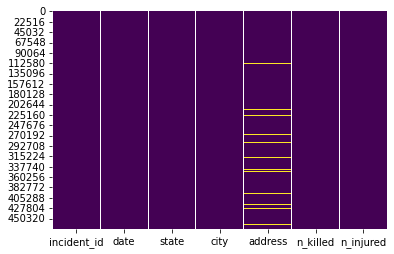

In [ ]:
# Visualiasai lokasi data kosong 
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [ ]:
# Tinjau data kosong pada kolom address
df[df["address"].isna()].sample(5)

,incident_id,date,state,city,address,n_killed,n_injured
290709,821898,2017-04-15,California,Pomona,NaN,0,0
73997,1939563,2021-01-07,South Carolina,Hampton,NaN,0,1
377468,453928,2015-10-21,Texas,Bexar (county),NaN,0,0
443402,167564,2014-08-01,Wisconsin,Tigerton,NaN,0,0
48618,2031319,2021-06-10,Arizona,Glendale,NaN,0,0


In [ ]:
# Data kosong pada kolom address pun akan diisi dengan Unknown untuk mengurangi kekeliruan peninjauan data

df = df.fillna(value={
    "address":"Unknown"})

# Data sudah bersih
att_null_check(df)

Akan ditunjukkan persentase data kosong pada setiap attribute:

Kolom incident_id :  0.000000% data kosong
Kolom date :         0.000000% data kosong
Kolom state :        0.000000% data kosong
Kolom city :         0.000000% data kosong
Kolom address :      0.000000% data kosong
Kolom n_killed :     0.000000% data kosong
Kolom n_injured :    0.000000% data kosong


## Data Engineering

### Pembuatan tabel status setiap state 

In [ ]:
US_State = df["state"].unique()
dfs = pd.DataFrame({
    "state":[],
    "crime_percentage":[],
    "Total_killed":[],
    "Total_injured":[]
})

for state in US_State:
  dummy_df = df[df["state"] == state]
  dfs = dfs.append(
      pd.DataFrame({
          "state":state,
          "crime_percentage":round(len(dummy_df)/len(df)*100,3),
          "Total_killed":dummy_df["n_killed"].sum(),
          "Total_injured":dummy_df["n_injured"].sum()
      },index=[0]),ignore_index=True
  )
dfs

,state,crime_percentage,Total_killed,Total_injured
0,Arkansas,1.181,1776.0,2867.0
1,Colorado,1.363,1883.0,3011.0
2,Missouri,2.758,4824.0,7572.0
3,South Carolina,2.683,3654.0,6549.0
4,California,6.502,11893.0,16606.0
5,Kentucky,1.789,2403.0,4286.0
6,Louisiana,3.326,4940.0,9753.0
7,Georgia,3.437,5679.0,8481.0
8,Utah,0.428,610.0,801.0
9,Illinois,7.575,7535.0,28832.0


### Normalisasi Data Frame

In [ ]:
# DataFrame akan dinormalisasi dengan Pemecahan DateTime menjadi year,month,date untuk memudahkan peninjauan
dfn = pd.DataFrame({
    "incident_id":df["incident_id"],
    "year":pd.DataFrame({"date":pd.DatetimeIndex(df['date']).year}).values.flatten(),
    "month":pd.DataFrame({"date":pd.DatetimeIndex(df['date']).month}).values.flatten(),
    "day": pd.DataFrame({"date":pd.DatetimeIndex(df['date']).day}).values.flatten(),
    "state":df['state'],
    "city":df["city"],
    "address":df["address"],
    "n_killed":df["n_killed"],
    "n_injured":df["n_injured"]
})

dfn

,incident_id,year,month,day,state,city,address,n_killed,n_injured
0,2314858,2022,5,28,Arkansas,Little Rock,W 9th St and Broadway St,0,1
1,2314409,2022,5,28,Colorado,Denver,3300 block of Clay St,0,1
2,2314498,2022,5,28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1
3,2314485,2022,5,28,South Carolina,Florence,Old River Rd,0,2
4,2314483,2022,5,28,California,Carmichael,4400 block of Manzanita Ave,1,0
...,...,...,...,...,...,...,...,...,...
472815,478959,2013,1,7,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2
472816,478925,2013,1,5,Colorado,Aurora,16000 block of East Ithaca Place,4,0
472817,478855,2013,1,1,Ohio,Lorain,1776 East 28th Street,1,3
472818,460726,2013,1,1,California,Hawthorne,13500 block of Cerise Avenue,1,3


## Data Analysis

### Analisis Berdasarkan Tahun

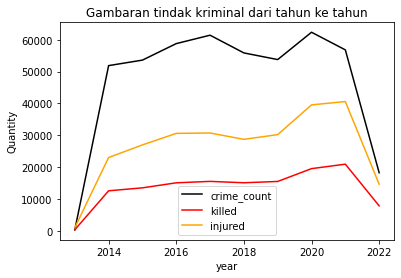

In [ ]:
# Ingin diketahui tren banyaknya insiden dari tahun ke tahun dengan DataFrame hasil normalisasi
dfn1 = dfn.groupby(["year"]).agg({
    "incident_id":"count",
    "n_killed":"sum",
    "n_injured":"sum"
})
dfn1.rename(columns={'incident_id':'crime_count'},inplace=True)
g = sns.lineplot(data=dfn1,x="year",y="crime_count",label='crime_count',color='black')
g1 = sns.lineplot(data=dfn1,x="year",y="n_killed",label='killed',color='red')
g2 = sns.lineplot(data=dfn1,x="year",y="n_injured",label='injured',color='orange')
plt.title("Gambaran tindak kriminal dari tahun ke tahun")
plt.xlabel('year') ; plt.ylabel('Quantity')

plt.show()


In [ ]:
# ingin dicari persebaran insiden kriminal setiap tahun nya 
US_year = dfn['year'].unique()

for year in US_year: 
  dummy_df = dfn[dfn['year']==year]
  min_month = min(dummy_df['month'].values.flatten())
  max_month = max(dummy_df['month'].values.flatten())
  count_month = len(dummy_df['month'].unique().flatten())
  print("Pada tahun {} , Peninjauan data dimulai pada bulan ke-{} sampai ke-{}, insiden tersebar dalam {} bulan".format(year,min_month,max_month,count_month))

Pada tahun 2022 , Peninjauan data dimulai pada bulan ke-1 sampai ke-5, insiden tersebar dalam 5 bulan
Pada tahun 2021 , Peninjauan data dimulai pada bulan ke-1 sampai ke-12, insiden tersebar dalam 12 bulan
Pada tahun 2020 , Peninjauan data dimulai pada bulan ke-1 sampai ke-12, insiden tersebar dalam 12 bulan
Pada tahun 2019 , Peninjauan data dimulai pada bulan ke-1 sampai ke-12, insiden tersebar dalam 12 bulan
Pada tahun 2018 , Peninjauan data dimulai pada bulan ke-1 sampai ke-12, insiden tersebar dalam 12 bulan
Pada tahun 2017 , Peninjauan data dimulai pada bulan ke-1 sampai ke-12, insiden tersebar dalam 12 bulan
Pada tahun 2016 , Peninjauan data dimulai pada bulan ke-1 sampai ke-12, insiden tersebar dalam 12 bulan
Pada tahun 2015 , Peninjauan data dimulai pada bulan ke-1 sampai ke-12, insiden tersebar dalam 12 bulan
Pada tahun 2014 , Peninjauan data dimulai pada bulan ke-1 sampai ke-12, insiden tersebar dalam 12 bulan
Pada tahun 2013 , Peninjauan data dimulai pada bulan ke-1 sampai k

  Perhatikan bahwa data 2013 dan 2022 merupakan pencilan bawah. Uniknya pada peninjauan diatas data kriminal yang terekam pada tahun 2013 sangat sedikit meskipun data yang tersedia tersebar dalam 12 bulan.Sedangkan pada tahun 2022 dengan nilai yang menurun sangat masuk akal karena data yang terkumpul hanya dalam 5 bulan saja

  Hal ini menimbulkan kecurigaan apakah data tahun 2013 tidak terekam dengan baik atau ada pemicu pada tahun 2014 yang menyebabkan lonjakan yang tinggi dan nilai kuantitas stabil tinggi pada tahun-tahun selanjutnya.





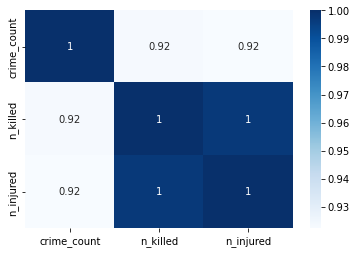

In [ ]:
sns.heatmap(dfn1.corr(),cbar=True,annot=True,cmap='Blues')

Jelas pada korelasi yang tertera bahwa varaibel crime_count,n_killed,dan n_injured saling berbanding lurus. Hal inipun sesuai ekspektasi terkait semakin banyak tindak kriminal, semakin banyak pula korban terbunuh atau terluka. 

In [ ]:
# Tabel sesuai dengan korelasi dimana crime_count tinggi menyebabkan n_killed dan n_injured yang tinggi 
dfn1.sort_values(by='crime_count',ascending=False)

,crime_count,n_killed,n_injured
year,,,
2020,62330,19515,39532
2017,61401,15511,30703
2016,58763,15066,30580
2021,56794,20921,40572
2018,55839,15085,28707
2019,53752,15490,30191
2015,53579,13484,26967
2014,51854,12557,23002
2022,18230,7829,14617


Hal Menarik adalah meski crime_count 2017 tidak begitu jauh dengan 2020. akan tetapi jumlah terbunuh dan terluka pada tahun 2020 cukup tinggi dibandingkan 2017. 

Hal ini menandakan tingkat kriminal dicurigai akan memakan lebih banyak korban jiwa seiring berjalan nya zaman.

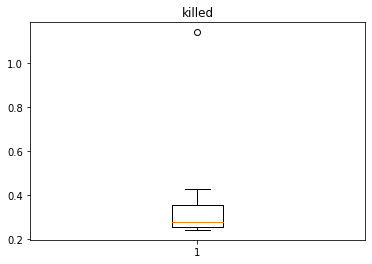

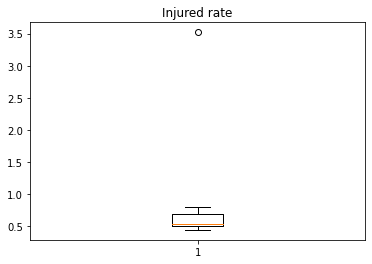

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('killed')
ax1.boxplot(dfn1['n_killed'].values/dfn1['crime_count'].values)

fig2, ax2 = plt.subplots()
ax2.set_title('Injured rate')
ax2.boxplot(dfn1['n_injured'].values/dfn1['crime_count'].values)

plt.show()

#Penghapusan data outliers
Q1 = dfn1['crime_count'].quantile(0.25)
Q3 = dfn1['crime_count'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (dfn1['crime_count'] >= Q1 - 1.5 * IQR) & (dfn1['crime_count'] <= Q3 + 1.5 *IQR)
dfn1_no = dfn1.loc[filter]  

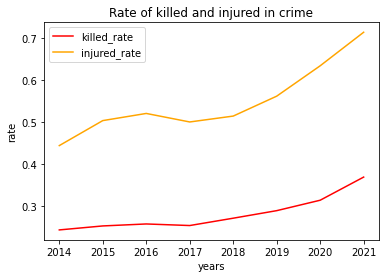

In [ ]:
plt.plot(dfn1_no.index.values,dfn1_no['n_killed'].values/dfn1_no['crime_count'].values,color='red')
plt.plot(dfn1_no.index.values,dfn1_no['n_injured'].values/dfn1_no['crime_count'].values,color='orange')
plt.legend(["killed_rate","injured_rate"]) ; plt.xlabel('years') ; plt.ylabel('rate')
plt.title('Rate of killed and injured in crime')
plt.show()

Sesuai dugaan, tingkat kematian dan terluka dari suatu insiden meningkat setiap tahun nya 

### Analisis Berdasarkan State

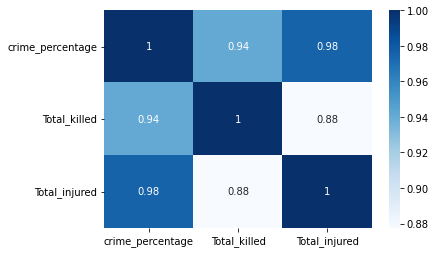

In [ ]:
sns.heatmap(dfs.corr(),cbar=True,annot=True,cmap='Blues')

Sama seperti analisis tahun sebelumnya bahwa semua variable cenderung memiliki korelasi mendekati satu. sehingga perbandingan dua variable cenderung berbanding lurus. 

In [ ]:
# Akan ditampilkan beberapa infografis terkait masing - masing state
# sepanjang tahun 2013 s.d 2020

aoa = [["5 State dengan tingkat kriminal",'crime_percentage'],
       ["5 State dengan tingkat kematian",'Total_killed'],
       ["5 State dengan tingkat terluka",'Total_injured']]

for i in range (len(aoa)):
  print("{} tertinggi :".format(aoa[i][0]))
  display(dfs.sort_values(by=aoa[i][1],ascending=False).head(5))
  print()
  print("============================================================")
  print()
  print("{} terendah :".format(aoa[i][0]))
  display(dfs.sort_values(by=aoa[i][1],ascending=True).head(5))
  print()
  print("============================================================")
  print()


5 State dengan tingkat kriminal tertinggi :


,state,crime_percentage,Total_killed,Total_injured
9,Illinois,7.575,7535.0,28832.0
4,California,6.502,11893.0,16606.0
16,Texas,6.385,11878.0,15979.0
26,Florida,5.630,8282.0,13899.0
12,Pennsylvania,4.496,5597.0,14541.0




5 State dengan tingkat kriminal terendah :


,state,crime_percentage,Total_killed,Total_injured
35,Hawaii,0.116,170.0,191.0
23,Wyoming,0.131,139.0,96.0
47,Vermont,0.161,120.0,147.0
48,North Dakota,0.183,153.0,225.0
50,South Dakota,0.189,186.0,219.0




5 State dengan tingkat kematian tertinggi :


,state,crime_percentage,Total_killed,Total_injured
4,California,6.502,11893.0,16606.0
16,Texas,6.385,11878.0,15979.0
26,Florida,5.630,8282.0,13899.0
9,Illinois,7.575,7535.0,28832.0
7,Georgia,3.437,5679.0,8481.0




5 State dengan tingkat kematian terendah :


,state,crime_percentage,Total_killed,Total_injured
47,Vermont,0.161,120.0,147.0
23,Wyoming,0.131,139.0,96.0
48,North Dakota,0.183,153.0,225.0
24,Rhode Island,0.299,161.0,582.0
35,Hawaii,0.116,170.0,191.0




5 State dengan tingkat terluka tertinggi :


,state,crime_percentage,Total_killed,Total_injured
9,Illinois,7.575,7535.0,28832.0
4,California,6.502,11893.0,16606.0
16,Texas,6.385,11878.0,15979.0
12,Pennsylvania,4.496,5597.0,14541.0
26,Florida,5.630,8282.0,13899.0




5 State dengan tingkat terluka terendah :


,state,crime_percentage,Total_killed,Total_injured
23,Wyoming,0.131,139.0,96.0
47,Vermont,0.161,120.0,147.0
35,Hawaii,0.116,170.0,191.0
50,South Dakota,0.189,186.0,219.0
48,North Dakota,0.183,153.0,225.0
